# Mobile price Prediction. 

Predict a price range, indicating how high the price is, using different Machine Learning algorithms.

### Step1. Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step2. Creating & Reading the data

In [4]:
#Load the Mobile dataset
mobile_data = pd.read_csv(r"C:\Users\shrey\OneDrive\Desktop\Imaritcus Notes\Machine Learning\Supervised_ML\Mobile-price-prediction-main\Mobile_data.csv")
mobile_data.sample(10)

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
1970,1913,1.8,0,29,0.6,111,5,4,675,742,2023,17,13,8,2
1080,1076,2.5,3,14,0.2,105,5,4,545,1300,2043,7,5,14,1
366,508,1.6,0,9,0.4,162,6,2,1419,1920,2616,18,8,10,2
471,1948,2.8,8,16,0.1,100,5,10,631,1940,3630,9,7,17,3
1884,1369,1.7,3,28,0.6,108,1,18,1451,1469,3206,16,15,4,3
1126,635,0.6,1,50,0.3,97,5,13,193,989,2107,13,12,12,1
348,869,1.0,7,57,0.6,118,1,15,1243,1584,2727,13,3,8,2
1452,1450,2.1,1,31,0.6,114,5,4,1573,1639,794,11,5,9,1
689,705,0.5,5,57,0.9,155,6,9,1114,1374,1509,15,11,18,1
1344,1429,0.6,8,42,0.9,151,5,9,670,1552,1817,6,1,16,1


In [5]:
mobile_data.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'price_range'],
      dtype='object')

In [6]:
mobile_data=mobile_data[['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w','talk_time', 'price_range']]

In [9]:
# Success
print("Mobile dataset has {} data points with {} variables each.".format(*mobile_data.shape))

Mobile dataset has 2000 data points with 15 variables each.


The columns which have been given in the dataset are important & can't be dropped or deleted from dataset, as all the columns provided are in relation to the price predictions of mobile.


### Step3. Data Exploration 

In [8]:
mobile_data.describe(include='all')

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,1.500000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,1.118314
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.750000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,2.250000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,3.000000


In [9]:
mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  price_range    2000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


In [10]:
mobile_data.dtypes

battery_power      int64
clock_speed      float64
fc                 int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
price_range        int64
dtype: object

### Step4. Check if there are missing values. If yes, handle them.

In [11]:
#Finding missing values
print(mobile_data.isnull().sum())

battery_power    0
clock_speed      0
fc               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
price_range      0
dtype: int64


In [12]:
#To check if there are any special characters in place of values 
for i in mobile_data.columns:
    print({i:mobile_data[i].unique()})

{'battery_power': array([ 842, 1021,  563, ..., 1139, 1467,  858], dtype=int64)}
{'clock_speed': array([2.2, 0.5, 2.5, 1.2, 1.7, 0.6, 2.9, 2.8, 2.1, 1. , 0.9, 1.1, 2.6,
       1.4, 1.6, 2.7, 1.3, 2.3, 2. , 1.8, 3. , 1.5, 1.9, 2.4, 0.8, 0.7])}
{'fc': array([ 1,  0,  2, 13,  3,  4,  5,  7, 11, 12, 16,  6, 15,  8,  9, 10, 18,
       17, 14, 19], dtype=int64)}
{'int_memory': array([ 7, 53, 41, 10, 44, 22, 24,  9, 33, 17, 52, 46, 13, 23, 49, 19, 39,
       47, 38,  8, 57, 51, 21,  5, 60, 61,  6, 11, 50, 34, 20, 27, 42, 40,
       64, 14, 63, 43, 16, 48, 12, 55, 36, 30, 45, 29, 58, 25,  3, 54, 15,
       37, 31, 32,  4, 18,  2, 56, 26, 35, 59, 28, 62], dtype=int64)}
{'m_dep': array([0.6, 0.7, 0.9, 0.8, 0.1, 0.5, 1. , 0.3, 0.4, 0.2])}
{'mobile_wt': array([188, 136, 145, 131, 141, 164, 139, 187, 174,  93, 182, 177, 159,
       198, 185, 196, 121, 101,  81, 156, 199, 114, 111, 132, 143,  96,
       200,  88, 150, 107, 100, 157, 160, 119,  87, 152, 166, 110, 118,
       162, 127, 109, 102, 104, 

From the above observations we can observe that there are no missing values or unique value in the data.
So,we won't eliminate or treat any missing values

In [13]:
mobile_data.corr()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
battery_power,1.000000,0.011482,0.033334,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.200723
clock_speed,0.011482,1.000000,-0.000434,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.006606
fc,0.033334,-0.000434,1.000000,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.021998
int_memory,-0.004004,0.006545,-0.029133,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,0.044435
m_dep,0.034085,-0.014364,-0.001791,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,0.000853
mobile_wt,0.001844,0.012350,0.023618,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,-0.030302
n_cores,-0.029727,-0.005724,-0.013356,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,0.004399
pc,0.031441,-0.005245,0.644595,-0.033273,0.026282,0.018844,-0.001193,1.000000,-0.018465,0.004196,0.028984,0.004938,-0.023819,0.014657,0.033599
px_height,0.014901,-0.014523,-0.009990,0.010441,0.025263,0.000939,-0.006872,-0.018465,1.000000,0.510664,-0.020352,0.059615,0.043038,-0.010645,0.148858
px_width,-0.008402,-0.009476,-0.005176,-0.008335,0.023566,0.000090,0.024480,0.004196,0.510664,1.000000,0.004105,0.021599,0.034699,0.006720,0.165818


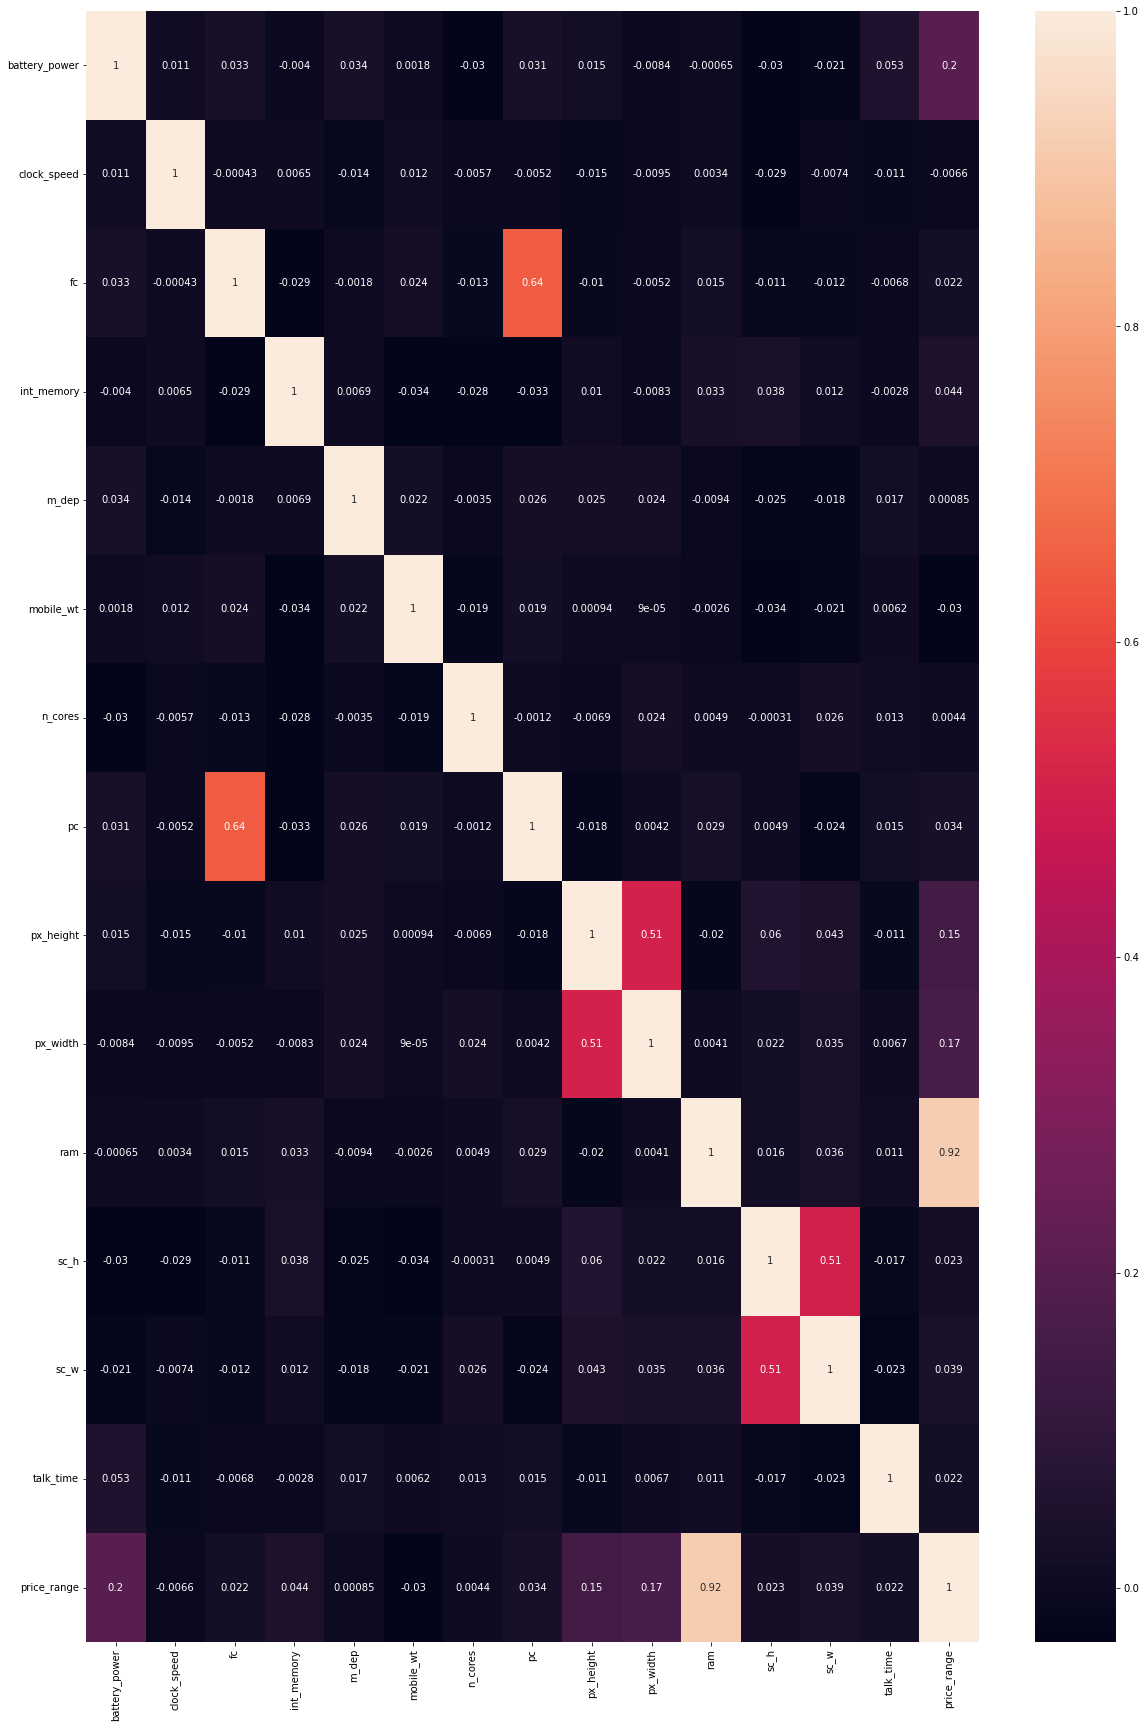

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = mobile_data.corr()
plt.figure(figsize=(20,30))
sns.heatmap(corr,annot=True)
plt.yticks(rotation=0)
plt.show()

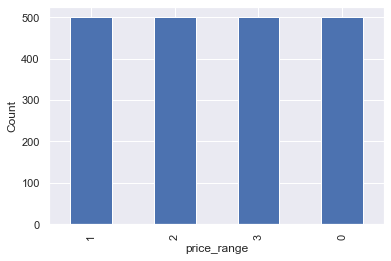

In [15]:
sns.set()
price_plot=mobile_data['price_range'].value_counts().plot(kind='bar')
plt.xlabel('price_range')
plt.ylabel('Count')
plt.show()

Observations:-
1. The value of 0 --> low cost
2. The value of 1 --> medium cost
3. The value of 2 --> high cost
4. The value of 3 --> very high cost

In [16]:
mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  price_range    2000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


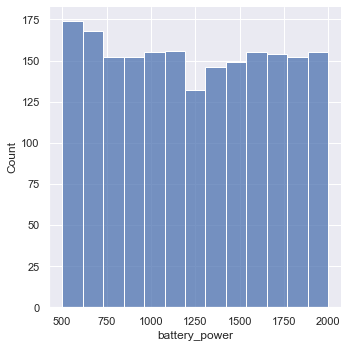

In [17]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=mobile_data["battery_power"])

plt.show()

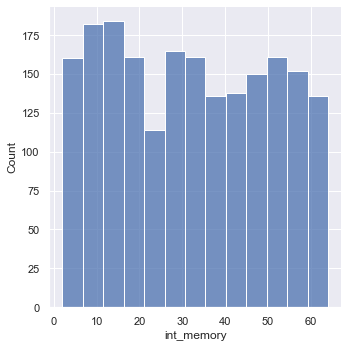

In [18]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=mobile_data["int_memory"])

plt.show()

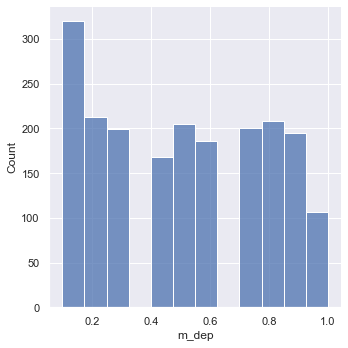

In [19]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=mobile_data["m_dep"])

plt.show()

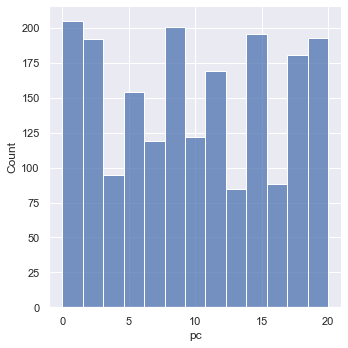

In [20]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=mobile_data["pc"])

plt.show()

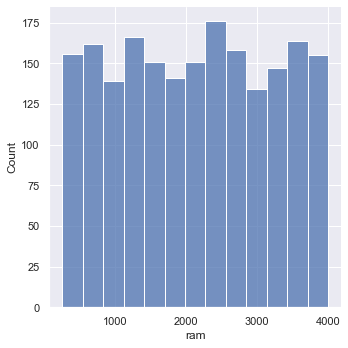

In [21]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=mobile_data["ram"])

plt.show()

### Step5. Creating X & Y

In [13]:
#Create X & Y 
X = mobile_data.values[:,0:-1]
Y = mobile_data.values[:,-1]

In [14]:
print(X.shape)
print(Y.shape)

(2000, 14)
(2000,)


In [15]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X)
X = scaler.transform(X)
print(X)

[[-0.90259726  0.83077942 -0.76249466 ... -0.78498329  0.2831028
   1.46249332]
 [-0.49513857 -1.2530642  -0.99289039 ...  1.11426556 -0.63531667
  -0.73426721]
 [-1.5376865  -1.2530642  -0.53209893 ... -0.31017108 -0.86492153
  -0.36814045]
 ...
 [ 1.53077336 -0.76274805 -0.76249466 ... -0.78498329 -1.0945264
  -1.10039396]
 [ 0.62252745 -0.76274805 -0.07130748 ...  1.35167167  0.9719174
   1.46249332]
 [-1.65833069  0.58562134  0.15908825 ...  1.58907778 -0.4057118
  -1.6495841 ]]


# Developing a Model

In this section of the project, we will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

## Step6. Shuffle and Split Data

Now we'll take the mobile dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

In [17]:
from sklearn.model_selection import train_test_split  #<1000=in range of 80-20  &  >1000=in range of 70-30

#Split the data into test and train
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [18]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1400, 14)
(1400,)
(600, 14)
(600,)


By spitting a dataset into training and testing subsets, we can train our model on the training subset, and then feed it with unseen data from the test subset to evaluate the performance of our model.

Training and testing on the same data doesn't give us a genuine evaluation of the model, at it has already seen testing the data when training, and thus might not perform well in real-world scenarios where we often deal with unseen data. Related to this is the problem of "overfitting", i.e. the model can be really accurate on the training data, but perform poorly on the training data.


# KNN Classifier

In [19]:
#predicting using the KNeighbors_Classifier
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))),
                              metric='euclidean')

#euclidean,manhattan,minkowski
#fit the model on the data and predict the values
model_KNN.fit(X_train,Y_train)

Y_pred=model_KNN.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

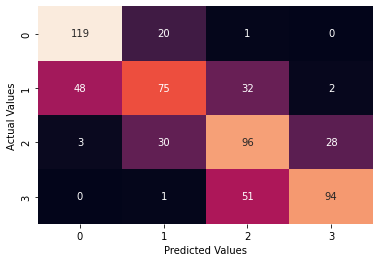

Classification report:
              precision    recall  f1-score   support

         0.0       0.70      0.85      0.77       140
         1.0       0.60      0.48      0.53       157
         2.0       0.53      0.61      0.57       157
         3.0       0.76      0.64      0.70       146

    accuracy                           0.64       600
   macro avg       0.65      0.65      0.64       600
weighted avg       0.64      0.64      0.64       600

Accuracy of the model:  0.64


In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [31]:
#predicting using the KNeighbors_Classifier
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))),
                              metric='manhattan')

#euclidean,manhattan,minkowski
#fit the model on the data and predict the values
model_KNN.fit(X_train,Y_train)

Y_pred=model_KNN.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

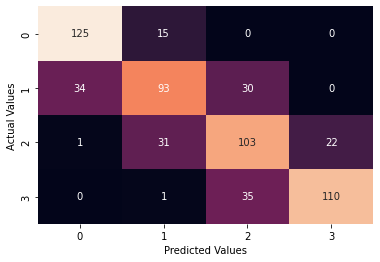

Classification report:
              precision    recall  f1-score   support

         0.0       0.78      0.89      0.83       140
         1.0       0.66      0.59      0.63       157
         2.0       0.61      0.66      0.63       157
         3.0       0.83      0.75      0.79       146

    accuracy                           0.72       600
   macro avg       0.72      0.72      0.72       600
weighted avg       0.72      0.72      0.72       600

Accuracy of the model:  0.7183333333333334


In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [33]:
#predicting using the KNeighbors_Classifier
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))),
                              metric='minkowski')

#euclidean,manhattan,minkowski
#fit the model on the data and predict the values
model_KNN.fit(X_train,Y_train)

Y_pred=model_KNN.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

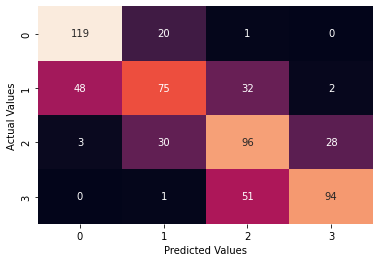

Classification report:
              precision    recall  f1-score   support

         0.0       0.70      0.85      0.77       140
         1.0       0.60      0.48      0.53       157
         2.0       0.53      0.61      0.57       157
         3.0       0.76      0.64      0.70       146

    accuracy                           0.64       600
   macro avg       0.65      0.65      0.64       600
weighted avg       0.64      0.64      0.64       600

Accuracy of the model:  0.64


In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

1. KNN was build on 3 metrics Euclidean,Manhattan & Minkowski
2. From the Observations we can see that the KNN model with "manhattan" metric was showing accuracy then that of the 
   other metrics.
3. So, manhattan metric will be taken into consideration for tuning the model for getting good accuracy & better results

### Tuning of the KNN model

In [48]:
from sklearn.metrics import accuracy_score
my_dict={}
for K in range(1,40):
    model_KNN=KNeighborsClassifier(n_neighbors=K,metric='manhattan')
    model_KNN.fit(X_train,Y_train)
    Y_pred=model_KNN.predict(X_test)
    print("Accuracy is",accuracy_score(Y_test,Y_pred), "for K-Value:",K)
    my_dict[K]=accuracy_score(Y_test,Y_pred)

Accuracy is 0.5216666666666666 for K-Value: 1
Accuracy is 0.5066666666666667 for K-Value: 2
Accuracy is 0.5583333333333333 for K-Value: 3
Accuracy is 0.5983333333333334 for K-Value: 4
Accuracy is 0.6116666666666667 for K-Value: 5
Accuracy is 0.62 for K-Value: 6
Accuracy is 0.6216666666666667 for K-Value: 7
Accuracy is 0.66 for K-Value: 8
Accuracy is 0.6516666666666666 for K-Value: 9
Accuracy is 0.665 for K-Value: 10
Accuracy is 0.6683333333333333 for K-Value: 11
Accuracy is 0.685 for K-Value: 12
Accuracy is 0.6866666666666666 for K-Value: 13
Accuracy is 0.7 for K-Value: 14
Accuracy is 0.7116666666666667 for K-Value: 15
Accuracy is 0.7083333333333334 for K-Value: 16
Accuracy is 0.705 for K-Value: 17
Accuracy is 0.695 for K-Value: 18
Accuracy is 0.6883333333333334 for K-Value: 19
Accuracy is 0.69 for K-Value: 20
Accuracy is 0.7016666666666667 for K-Value: 21
Accuracy is 0.7116666666666667 for K-Value: 22
Accuracy is 0.72 for K-Value: 23
Accuracy is 0.7116666666666667 for K-Value: 24
Accu

In [49]:
for k in my_dict:
    if my_dict[k]==max(my_dict.values()):
        print(k,":",my_dict[k])

34 : 0.7316666666666667


In [36]:
#predicting using the KNeighbors_Classifier
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=34, metric='manhattan')

#euclidean,manhattan,minkowski
#fit the model on the data and predict the values
model_KNN.fit(X_train,Y_train)

Y_pred=model_KNN.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

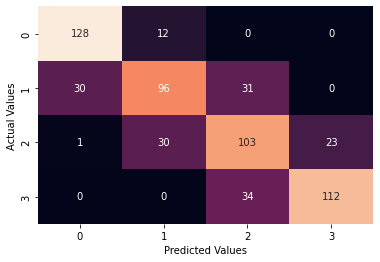

Classification report:
              precision    recall  f1-score   support

         0.0       0.81      0.91      0.86       140
         1.0       0.70      0.61      0.65       157
         2.0       0.61      0.66      0.63       157
         3.0       0.83      0.77      0.80       146

    accuracy                           0.73       600
   macro avg       0.74      0.74      0.73       600
weighted avg       0.73      0.73      0.73       600

Accuracy of the model:  0.7316666666666667


In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

Tuned KNN model was not showing good results & it was not even giving a good accuracy which is expected

### Trying out different algorithms

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [64]:
tree=DecisionTreeClassifier(random_state=10)        
svm=SVC(kernel="rbf",gamma=0.01,C=20)
RF=RandomForestClassifier(n_estimators=50,random_state=10)
cf = LogisticRegression()
gnb = GaussianNB()
XGBoost=XGBClassifier(n_estimators=100,random_state=10)

In [65]:
models=[tree,svm,RF,cf,gnb,XGBoost]

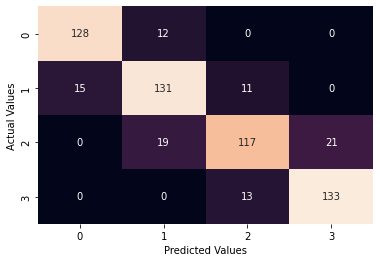


              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90       140
         1.0       0.81      0.83      0.82       157
         2.0       0.83      0.75      0.79       157
         3.0       0.86      0.91      0.89       146

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600

Accuracy of the DecisionTreeClassifier  model is  0.8483333333333334



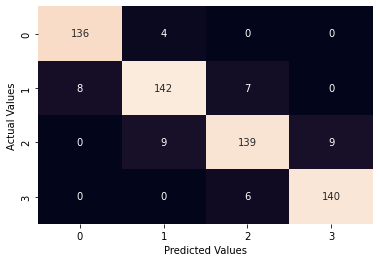


              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96       140
         1.0       0.92      0.90      0.91       157
         2.0       0.91      0.89      0.90       157
         3.0       0.94      0.96      0.95       146

    accuracy                           0.93       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.93      0.93      0.93       600

Accuracy of the SVC  model is  0.9283333333333333



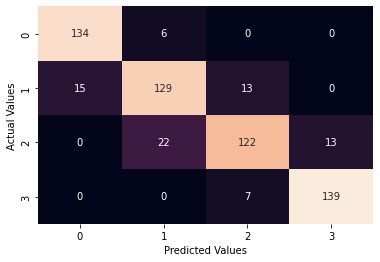


              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93       140
         1.0       0.82      0.82      0.82       157
         2.0       0.86      0.78      0.82       157
         3.0       0.91      0.95      0.93       146

    accuracy                           0.87       600
   macro avg       0.87      0.88      0.87       600
weighted avg       0.87      0.87      0.87       600

Accuracy of the RandomForestClassifier  model is  0.8733333333333333



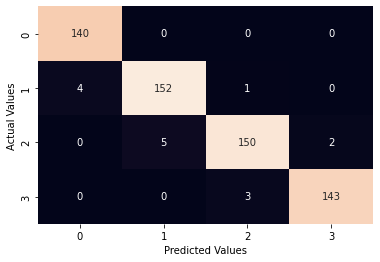


              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       140
         1.0       0.97      0.97      0.97       157
         2.0       0.97      0.96      0.96       157
         3.0       0.99      0.98      0.98       146

    accuracy                           0.97       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.97      0.97       600

Accuracy of the LogisticRegression  model is  0.975



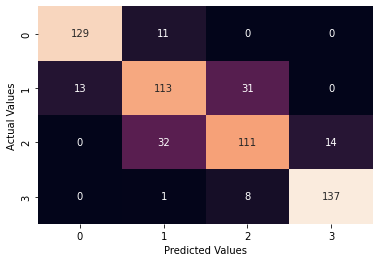


              precision    recall  f1-score   support

         0.0       0.91      0.92      0.91       140
         1.0       0.72      0.72      0.72       157
         2.0       0.74      0.71      0.72       157
         3.0       0.91      0.94      0.92       146

    accuracy                           0.82       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.81      0.82      0.82       600

Accuracy of the GaussianNB  model is  0.8166666666666667



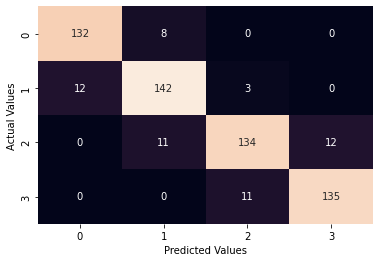


              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93       140
         1.0       0.88      0.90      0.89       157
         2.0       0.91      0.85      0.88       157
         3.0       0.92      0.92      0.92       146

    accuracy                           0.91       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.91      0.91      0.90       600

Accuracy of the XGBClassifier  model is  0.905



In [66]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

for model in models:
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    cfm=confusion_matrix(Y_test,Y_pred)
    sns.heatmap(cfm, annot=True, fmt='g', cbar=False)
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.show()
    print()
    clf_report= classification_report(Y_test,Y_pred)
    print(clf_report)
    accuracy=accuracy_score(Y_test,Y_pred)
    print("Accuracy of the",type(model).__name__, " model is ",accuracy)
    print()

From all the models we applied we saw that the logistic regression was showing more accuracy & the misclassification of the values was in very less in number as compared to the other models.